In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
data='/..../Data Science/Projects/PERM/perm2.xlsx'

In [19]:
#windows
#da= "C:\\....\Data Science\Projects\PERM\perm2.xlsx"

In [20]:
df=pd.read_excel(data)

In [21]:
df.head()

,CASE_NUMBER,DECISION_DATE,CASE_STATUS,CASE_RECEIVED_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_COUNTRY,EMPLOYER_NUM_EMPLOYEES,EMPLOYER_YR_ESTAB,wage_level,wage_offer,wage_unit,job_title,JOB_INFO_EDUCATION,JOB_INFO_EXPERIENCE_NUM_MONTHS,COUNTRY_OF_CITIZENSHIP
0,A-17268-91243,2017-10-01,Withdrawn,2017-09-29,DATA MEANING SERVICES GROUP,FL,UNITED STATES OF AMERICA,29.0,2010.0,Level III,82368,Year,Web Architect,None,24.0,BRAZIL
1,A-17268-91198,2017-10-01,Withdrawn,2017-09-29,NOVO NORDISK INC.,NJ,UNITED STATES OF AMERICA,5234.0,1982.0,NaN,100900,Year,Senior Systems Analyst,Bachelor's,NaN,INDIA
2,A-17275-93842,2017-10-02,Withdrawn,2017-10-02,HITACHI CONSULTING CORPORATION,TX,UNITED STATES OF AMERICA,1200.0,2000.0,Level II,79414,Year,Software Engineer,Master's,NaN,INDIA
3,A-17257-86988,2017-10-02,Withdrawn,2017-10-02,HITACHI CONSULTING CORPORATION,TX,UNITED STATES OF AMERICA,1200.0,2000.0,Level II,79414,Year,Software Engineer,Master's,NaN,INDIA
4,A-17263-89145,2017-10-02,Withdrawn,2017-10-02,FANATICS RETAIL GROUP FULFILLMENT INC DBA FANA...,FL,UNITED STATES OF AMERICA,5020.0,1995.0,Level I,81349,Year,Predictive Analyst,Master's,12.0,CHINA


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119776 entries, 0 to 119775
Data columns (total 16 columns):
CASE_NUMBER                       119776 non-null object
DECISION_DATE                     119776 non-null datetime64[ns]
CASE_STATUS                       119776 non-null object
CASE_RECEIVED_DATE                119776 non-null datetime64[ns]
EMPLOYER_NAME                     119776 non-null object
EMPLOYER_STATE                    119768 non-null object
EMPLOYER_COUNTRY                  119738 non-null object
EMPLOYER_NUM_EMPLOYEES            119740 non-null float64
EMPLOYER_YR_ESTAB                 119703 non-null float64
wage_level                        111389 non-null object
wage_offer                        119734 non-null object
wage_unit                         119732 non-null object
job_title                         119738 non-null object
JOB_INFO_EDUCATION                119767 non-null object
JOB_INFO_EXPERIENCE_NUM_MONTHS    69682 non-null float64
COUNTRY_OF_CITIZ

In [23]:
df=df.rename(columns=lambda x:x.lower())

In [24]:
df.employer_country.value_counts()

UNITED STATES OF AMERICA    119731
CANADA                           3
ICELAND                          1
VIETNAM                          1
COLOMBIA                         1
GEORGIA                          1
Name: employer_country, dtype: int64

In [25]:
df.set_index('employer_country', inplace=True)

In [26]:
df.drop(['CANADA','VIETNAM','COLOMBIA','ICELAND','GEORGIA'], inplace=True)

In [27]:
df.reset_index(inplace=True)

In [28]:
df.employer_country.value_counts()

UNITED STATES OF AMERICA    119731
Name: employer_country, dtype: int64

In [29]:
df.drop('employer_country', axis=1, inplace=True)

In [30]:
df.head()

,case_number,decision_date,case_status,case_received_date,employer_name,employer_state,employer_num_employees,employer_yr_estab,wage_level,wage_offer,wage_unit,job_title,job_info_education,job_info_experience_num_months,country_of_citizenship
0,A-17268-91243,2017-10-01,Withdrawn,2017-09-29,DATA MEANING SERVICES GROUP,FL,29.0,2010.0,Level III,82368,Year,Web Architect,None,24.0,BRAZIL
1,A-17268-91198,2017-10-01,Withdrawn,2017-09-29,NOVO NORDISK INC.,NJ,5234.0,1982.0,NaN,100900,Year,Senior Systems Analyst,Bachelor's,NaN,INDIA
2,A-17275-93842,2017-10-02,Withdrawn,2017-10-02,HITACHI CONSULTING CORPORATION,TX,1200.0,2000.0,Level II,79414,Year,Software Engineer,Master's,NaN,INDIA
3,A-17257-86988,2017-10-02,Withdrawn,2017-10-02,HITACHI CONSULTING CORPORATION,TX,1200.0,2000.0,Level II,79414,Year,Software Engineer,Master's,NaN,INDIA
4,A-17263-89145,2017-10-02,Withdrawn,2017-10-02,FANATICS RETAIL GROUP FULFILLMENT INC DBA FANA...,FL,5020.0,1995.0,Level I,81349,Year,Predictive Analyst,Master's,12.0,CHINA


In [31]:
def missing_values_table(df):
    '''Calculate Missing Values of Each Column'''
    # Total missing amount in each feature /series type
    missing_value = df.isnull().sum()

    # Percentage of that missing values in its column /series type
    miss_percent = 100*missing_value/df.shape[0]

    # Make a table of calculated fields /will make dataframe
    table = pd.concat([missing_value, miss_percent], axis=1).rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort by percentages column
    table.sort_values(by=['% of Total Values'], ascending=False,
                      inplace=True)

    # Print Summary Information
    print('\nThe DataFrame has ' + str(df.shape[1]) + ' columns.\n'
          'There are ' + str(table.shape[0]) + ' columns that have missing values')

    return table


missing_values_table(df)


The DataFrame has 15 columns.
There are 15 columns that have missing values


,Missing Values,% of Total Values
job_info_experience_num_months,50093,41.824679
wage_level,8387,7.002647
employer_yr_estab,73,0.060951
wage_unit,44,0.036737
wage_offer,42,0.035068
job_title,38,0.031728
employer_num_employees,36,0.030058
country_of_citizenship,11,0.009184
job_info_education,9,0.007514
employer_state,8,0.006680


In [32]:
df[['wage_offer', 'employer_yr_estab']]=df[['wage_offer', 'employer_yr_estab']].astype(str)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119769 entries, 0 to 119768
Data columns (total 15 columns):
case_number                       119769 non-null object
decision_date                     119769 non-null datetime64[ns]
case_status                       119769 non-null object
case_received_date                119769 non-null datetime64[ns]
employer_name                     119769 non-null object
employer_state                    119761 non-null object
employer_num_employees            119733 non-null float64
employer_yr_estab                 119769 non-null object
wage_level                        111382 non-null object
wage_offer                        119769 non-null object
wage_unit                         119725 non-null object
job_title                         119731 non-null object
job_info_education                119760 non-null object
job_info_experience_num_months    69676 non-null float64
country_of_citizenship            119758 non-null object
dtypes: datetime6

In [34]:
df['wage_offer']=df.wage_offer.apply(pd.to_numeric, errors='coerce') 

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119769 entries, 0 to 119768
Data columns (total 15 columns):
case_number                       119769 non-null object
decision_date                     119769 non-null datetime64[ns]
case_status                       119769 non-null object
case_received_date                119769 non-null datetime64[ns]
employer_name                     119769 non-null object
employer_state                    119761 non-null object
employer_num_employees            119733 non-null float64
employer_yr_estab                 119769 non-null object
wage_level                        111382 non-null object
wage_offer                        119726 non-null float64
wage_unit                         119725 non-null object
job_title                         119731 non-null object
job_info_education                119760 non-null object
job_info_experience_num_months    69676 non-null float64
country_of_citizenship            119758 non-null object
dtypes: datetime

In [36]:
df.describe()

,employer_num_employees,wage_offer,job_info_experience_num_months
count,1.197330e+05,1.197260e+05,69676.000000
mean,3.437806e+04,8.737608e+04,31.922872
std,1.016347e+05,4.270670e+04,22.330237
min,0.000000e+00,7.250000e+00,0.000000
25%,7.100000e+01,6.421000e+04,12.000000
50%,1.300000e+03,9.081300e+04,24.000000
75%,1.772700e+04,1.108020e+05,48.000000
max,1.400000e+06,6.262900e+06,300.000000


# 1.Which employer has the most entries in the dataset?

In [37]:
df.employer_name.value_counts().index[0]

'MICROSOFT CORPORATION'

# 2.Which employer has the most “Denied” cases?

In [38]:
df.employer_name[df['case_status']=='Denied'].value_counts().index[0]

'ABBYLAND FOODS, INC'

# 3.How many unique employers contain the character string "APPLE" that is not "APPLE INC."?

In [39]:
unique_employers=pd.Series(df['employer_name'].unique())
unique_employers

0                              DATA MEANING SERVICES GROUP
1                                        NOVO NORDISK INC.
2                           HITACHI CONSULTING CORPORATION
3        FANATICS RETAIL GROUP FULFILLMENT INC DBA FANA...
4                                AKAMAI TECHNOLOGIES, INC.
                               ...                        
31957          THE SHIN IL PRESBYTERIAN CHURCH OF NY, INC.
31958                  Prime Rehabilitation Services, Inc.
31959                                           KURISU LLC
31960    TCB Quality Landscaping, Inc. dba TCB Landscaping
31961                                        Tjasa Hranjec
Length: 31962, dtype: object

In [40]:
apple_inc=unique_employers.str.contains('APPLE INC.')
apple=unique_employers.str.contains('APPLE')

In [41]:
apple.sum()
apple_inc.sum()

only_apple= apple.sum()-apple_inc.sum()

print('Number of unique employers contain APPLE without INC.:', only_apple)

Number of unique employers contain APPLE without INC.: 6


# 4.Write a function that plots a histogram with 50 bins of the duration between from case_received_date to decision_date for any given employeer_name. Use the function to plot for "APPLE INC." and "MICROSOFT CORPORATION"

In [42]:
import datetime 
import matplotlib.pyplot as plt

In [43]:

df['case_received_date'] = pd.to_datetime(df['case_received_date'])
df['decision_date'] = pd.to_datetime(df['decision_date'])

In [44]:
duration=df['decision_date'] - df['case_received_date']
df['duration']=duration

In [45]:
def plot_duration(company_name):
    
    days = df[df['employer_name']== company_name]['duration'].reset_index()
    plt.figure(figsize=(12,8)) 
    dur = []
    for i in range(len(days)):
        v = days.iloc[i].duration.days
        dur.append(v)
    plt.hist(dur, bins=50)
    plt.title(company_name)
    plt.show()
    

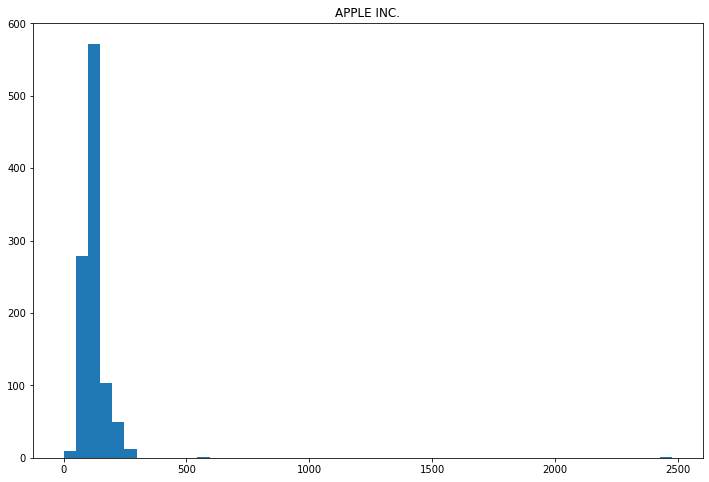

In [46]:
plot_duration('APPLE INC.')

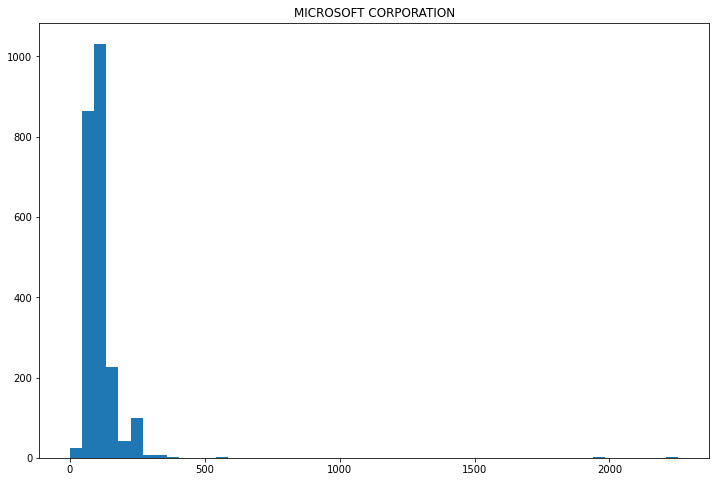

In [47]:
plot_duration('MICROSOFT CORPORATION')

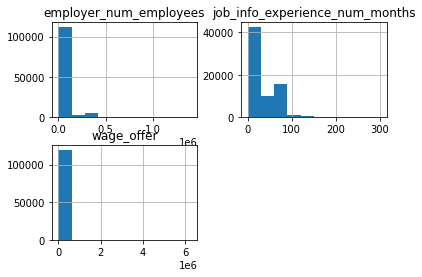

In [58]:


df.hist()


plt.show()

# How might missing values be handled?

In [59]:
df.isnull().sum()

case_number                           0
decision_date                         0
case_status                           0
case_received_date                    0
employer_name                         0
employer_state                        8
employer_num_employees               36
employer_yr_estab                     0
wage_level                         8387
wage_offer                           43
wage_unit                            44
job_title                            38
job_info_education                    9
job_info_experience_num_months    50093
country_of_citizenship               11
duration                              0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119769 entries, 0 to 119768
Data columns (total 16 columns):
case_number                       119769 non-null object
decision_date                     119769 non-null datetime64[ns]
case_status                       119769 non-null object
case_received_date                119769 non-null datetime64[ns]
employer_name                     119769 non-null object
employer_state                    119761 non-null object
employer_num_employees            119733 non-null float64
employer_yr_estab                 119769 non-null object
wage_level                        111382 non-null object
wage_offer                        119726 non-null float64
wage_unit                         119725 non-null object
job_title                         119731 non-null object
job_info_education                119760 non-null object
job_info_experience_num_months    69676 non-null float64
country_of_citizenship            119758 non-null object
duration        

<Figure size 432x576 with 0 Axes>

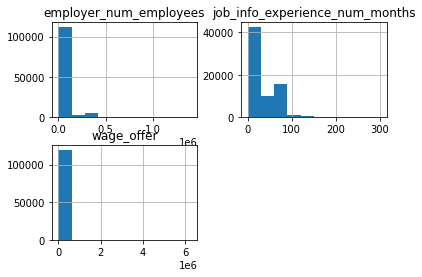

In [61]:
plt.figure(figsize=(6,8))
df.hist()
plt.show();

We choose use median statistic to fill in numerical missing values as data is skewed.

In [62]:
df['employer_num_employees'].fillna(df['employer_num_employees'].median(), inplace=True)
df['job_info_experience_num_months'].fillna(df['job_info_experience_num_months'].median(), inplace=True)
df['wage_offer'].fillna(df['wage_offer'].median(), inplace=True)

In [63]:
#def impute_median(series):
    #return series.fillna(series.median())
    
#impute_median(df)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119769 entries, 0 to 119768
Data columns (total 16 columns):
case_number                       119769 non-null object
decision_date                     119769 non-null datetime64[ns]
case_status                       119769 non-null object
case_received_date                119769 non-null datetime64[ns]
employer_name                     119769 non-null object
employer_state                    119761 non-null object
employer_num_employees            119769 non-null float64
employer_yr_estab                 119769 non-null object
wage_level                        111382 non-null object
wage_offer                        119769 non-null float64
wage_unit                         119725 non-null object
job_title                         119731 non-null object
job_info_education                119760 non-null object
job_info_experience_num_months    119769 non-null float64
country_of_citizenship            119758 non-null object
duration       

In [65]:
df.isnull().sum()

case_number                          0
decision_date                        0
case_status                          0
case_received_date                   0
employer_name                        0
employer_state                       8
employer_num_employees               0
employer_yr_estab                    0
wage_level                        8387
wage_offer                           0
wage_unit                           44
job_title                           38
job_info_education                   9
job_info_experience_num_months       0
country_of_citizenship              11
duration                             0
dtype: int64

In [66]:
df_clean=df.drop(['decision_date', 'case_received_date', 'case_number'], axis=1)

In [67]:
df_clean=df_clean.dropna()

In [68]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111345 entries, 0 to 119768
Data columns (total 13 columns):
case_status                       111345 non-null object
employer_name                     111345 non-null object
employer_state                    111345 non-null object
employer_num_employees            111345 non-null float64
employer_yr_estab                 111345 non-null object
wage_level                        111345 non-null object
wage_offer                        111345 non-null float64
wage_unit                         111345 non-null object
job_title                         111345 non-null object
job_info_education                111345 non-null object
job_info_experience_num_months    111345 non-null float64
country_of_citizenship            111345 non-null object
duration                          111345 non-null timedelta64[ns]
dtypes: float64(3), object(9), timedelta64[ns](1)
memory usage: 11.9+ MB


# What transformations are relevant?

In [69]:
wage_units = df_clean['wage_unit'].unique()

In [70]:
wage_units = df_clean['wage_unit'].unique()
df_clean['wage_offer'][df_clean['wage_unit'] == 'Month']  = df_clean[df_clean['wage_unit'] == 'Month']['wage_offer'] * 12
df_clean['wage_offer'][df_clean['wage_unit'] == 'Week']  = df_clean[df_clean['wage_unit'] == 'Week']['wage_offer'] * 52
df_clean['wage_offer'][df_clean['wage_unit'] == 'Hour']  = df_clean[df_clean['wage_unit'] == 'Hour']['wage_offer']*2080

/Users/poyraz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/poyraz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Are there any outliers?

In [71]:
for feature in df_clean.select_dtypes(include=[np.float64, np.int64]).columns:
    step=1.5*((np.percentile(df_clean[feature], q=75))-(np.percentile(df_clean[feature], q=25)))
    lower_bound=(np.percentile(df_clean[feature], q=25))-step
    upper_bound=(np.percentile(df_clean[feature], q=75))+step
    df_clean.drop(list(df_clean.loc[df_clean[feature]<lower_bound].index)+
              list(df_clean.loc[df_clean[feature]>upper_bound].index), inplace=True)

In [72]:
df_clean.shape

(55721, 13)

In [73]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

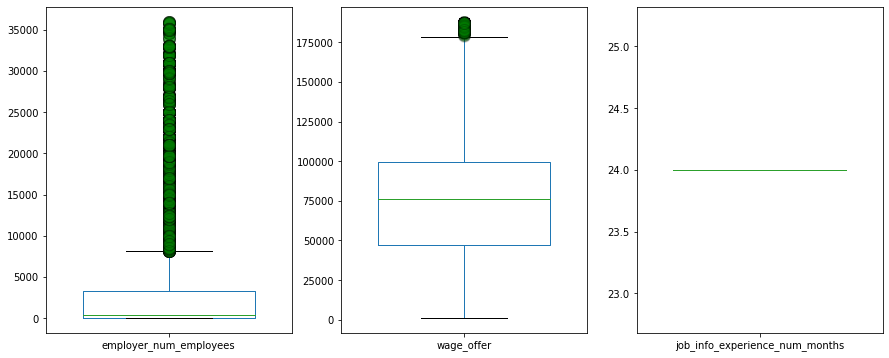

In [74]:
#Make subplotted figure
fig, axes = plt.subplots(1, 3, figsize=(15,6))

#Cycle through all relevant columns
i = 1
for col in df_clean.select_dtypes(include=[np.float64, np.int64]).columns:
    plt.subplot(1, 3, i)
    df_clean[col].plot.box(widths=0.7, flierprops=dict(markerfacecolor='g', markersize=12, alpha=0.1), vert=True)
    i += 1
#Displaying the plot
plt.show()

In [75]:
# Computing percentages of outliers with a "for loop"
data=df_clean.copy()
for feature in data.select_dtypes(include=[np.float64, np.int64]).columns:
    step=1.5*((np.percentile(data[feature], q=75))-(np.percentile(data[feature], q=25)))
    lower_bound=(np.percentile(data[feature], q=25))-step
    upper_bound=(np.percentile(data[feature], q=75))+step
    a = (len(list(data.loc[data[feature]<lower_bound].index))+
            (len(list(data.loc[data[feature]>upper_bound].index))))/df_clean.shape[0]
    print('{}:  {}'.format(feature,a))

employer_num_employees:  0.14599522621632777
wage_offer:  0.006119775309129412
job_info_experience_num_months:  0.0


# What additional features could be engineered?

In [76]:
df_clean.dtypes

case_status                                object
employer_name                              object
employer_state                             object
employer_num_employees                    float64
employer_yr_estab                          object
wage_level                                 object
wage_offer                                float64
wage_unit                                  object
job_title                                  object
job_info_education                         object
job_info_experience_num_months            float64
country_of_citizenship                     object
duration                          timedelta64[ns]
dtype: object

In [77]:
df_clean = df_clean.loc[df['case_status']=='Certified',:]
df_clean.head()

,case_status,employer_name,employer_state,employer_num_employees,employer_yr_estab,wage_level,wage_offer,wage_unit,job_title,job_info_education,job_info_experience_num_months,country_of_citizenship,duration
41889,Certified,"FACEBOOK, INC.",CA,14765.0,2004.0,Level I,122949.0,Year,Engineering Manager,Bachelor's,24.0,CHINA,125 days
41890,Certified,"DELEK US HOLDINGS, INC.",TN,3200.0,2001.0,Level IV,85405.0,Year,Sr. Systems Analyst - Refinery Systems,Bachelor's,24.0,INDIA,125 days
41893,Certified,COMPROBASE INC,VA,43.0,2004.0,Level II,83221.0,Year,System Administrators,Master's,24.0,INDIA,125 days
41894,Certified,YSK GROUP INC,CO,1.0,2001.0,Level I,18762.0,Year,CASHIER,None,24.0,SOUTH KOREA,125 days
41898,Certified,COMPSYCH MANAGEMENT CORPORATION,IL,725.0,1990.0,Level II,83366.0,Year,Technical Team Lead,Master's,24.0,INDIA,125 days


In [78]:
df_clean = df_clean.drop(['case_status', 'duration', 'wage_unit'], axis=1)

In [79]:
df_clean=df_clean.iloc[: : 3, : ]

In [80]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10604 entries, 41889 to 119759
Data columns (total 10 columns):
employer_name                     10604 non-null object
employer_state                    10604 non-null object
employer_num_employees            10604 non-null float64
employer_yr_estab                 10604 non-null object
wage_level                        10604 non-null object
wage_offer                        10604 non-null float64
job_title                         10604 non-null object
job_info_education                10604 non-null object
job_info_experience_num_months    10604 non-null float64
country_of_citizenship            10604 non-null object
dtypes: float64(3), object(7)
memory usage: 911.3+ KB


In [81]:
df_clean[['employer_num_employees','wage_offer','job_info_experience_num_months']]=df_clean[['employer_num_employees','wage_offer','job_info_experience_num_months']].astype(int)

In [82]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10604 entries, 41889 to 119759
Data columns (total 10 columns):
employer_name                     10604 non-null object
employer_state                    10604 non-null object
employer_num_employees            10604 non-null int64
employer_yr_estab                 10604 non-null object
wage_level                        10604 non-null object
wage_offer                        10604 non-null int64
job_title                         10604 non-null object
job_info_education                10604 non-null object
job_info_experience_num_months    10604 non-null int64
country_of_citizenship            10604 non-null object
dtypes: int64(3), object(7)
memory usage: 911.3+ KB


In [83]:
df_clean.head()

,employer_name,employer_state,employer_num_employees,employer_yr_estab,wage_level,wage_offer,job_title,job_info_education,job_info_experience_num_months,country_of_citizenship
41889,"FACEBOOK, INC.",CA,14765,2004.0,Level I,122949,Engineering Manager,Bachelor's,24,CHINA
41894,YSK GROUP INC,CO,1,2001.0,Level I,18762,CASHIER,None,24,SOUTH KOREA
41905,"CITRIX SYSTEMS, INC.",FL,5110,1989.0,Level II,124675,Software Engineer,Master's,24,INDIA
41908,"ANSYS, INC",PA,2800,1970.0,Level III,87818,Senior Software Developer,Master's,24,INDIA
41913,CHALLENGER SPORTS CORPORATION,KS,500,1997.0,Level II,27183,Regional Director,Bachelor's,24,UNITED KINGDOM


In [84]:
df_clean.drop('job_title', axis=1, inplace=True)

In [85]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10604 entries, 41889 to 119759
Data columns (total 9 columns):
employer_name                     10604 non-null object
employer_state                    10604 non-null object
employer_num_employees            10604 non-null int64
employer_yr_estab                 10604 non-null object
wage_level                        10604 non-null object
wage_offer                        10604 non-null int64
job_info_education                10604 non-null object
job_info_experience_num_months    10604 non-null int64
country_of_citizenship            10604 non-null object
dtypes: int64(3), object(6)
memory usage: 828.4+ KB


In [86]:
df_pre = pd.get_dummies(df_clean, drop_first=True)
df_pre.columns

Index(['employer_num_employees', 'wage_offer',
       'job_info_experience_num_months', 'employer_name_10312 LLC',
       'employer_name_111 Great Nail, Inc.',
       'employer_name_1700 BRICKELL CONDO LLC',
       'employer_name_1STDIBS.COM, INC.', 'employer_name_24 HOUR FITNESS',
       'employer_name_280 Technologies',
       'employer_name_2KDirect, Inc. (dba iPromote)',
       ...
       'country_of_citizenship_UGANDA', 'country_of_citizenship_UKRAINE',
       'country_of_citizenship_UNITED KINGDOM',
       'country_of_citizenship_UNITED STATES OF AMERICA',
       'country_of_citizenship_URUGUAY', 'country_of_citizenship_UZBEKISTAN',
       'country_of_citizenship_VENEZUELA', 'country_of_citizenship_VIETNAM',
       'country_of_citizenship_ZAMBIA', 'country_of_citizenship_ZIMBABWE'],
      dtype='object', length=6238)

# Visualization

In [87]:
sns.set_style('whitegrid')

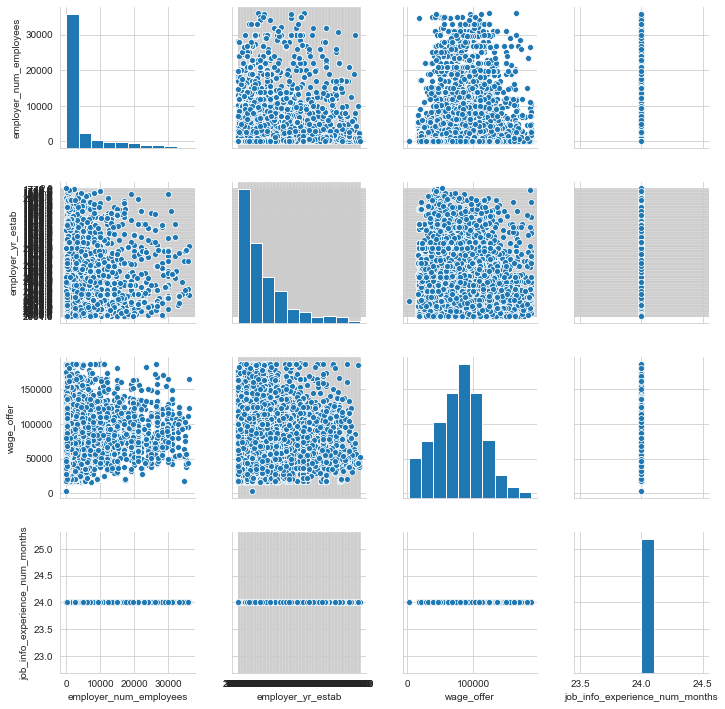

In [88]:
sns.pairplot(df_clean)
plt.show()

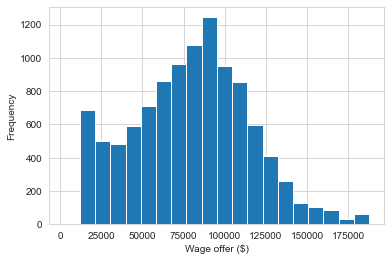

In [89]:
df_clean['wage_offer'].hist(bins=20)
plt.xlabel('Wage offer ($)')
plt.ylabel('Frequency')
plt.show()

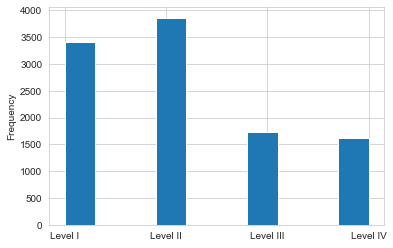

In [90]:
df_clean['wage_level'].hist()
plt.ylabel('Wage Levels')
plt.ylabel('Frequency')
plt.show()

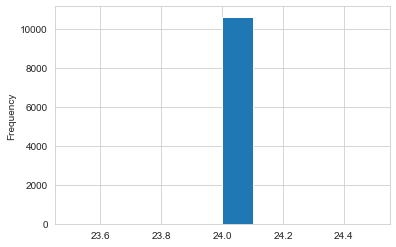

In [91]:
df_clean['job_info_experience_num_months'].hist()
plt.ylabel('Required Experience')
plt.ylabel('Frequency')
plt.show()

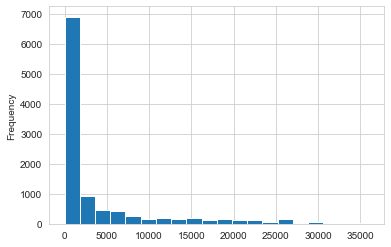

In [92]:
df_clean['employer_num_employees'].hist(bins=20)
plt.ylabel('Employer number of employees')
plt.ylabel('Frequency')
plt.show()

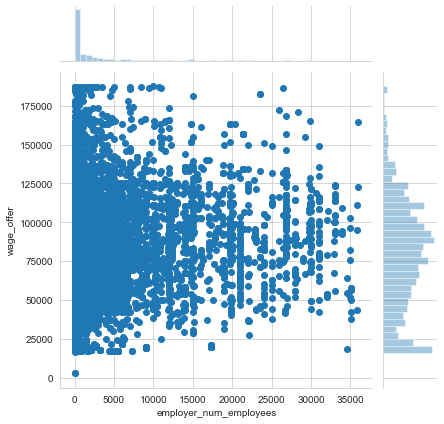

In [93]:
sns.jointplot(x='employer_num_employees', y='wage_offer', data=df_clean)
plt.show()

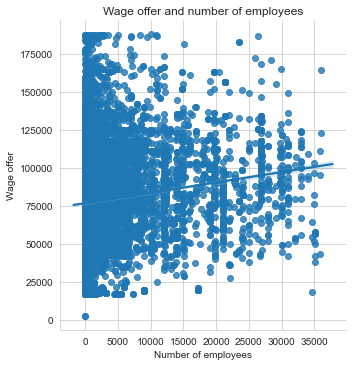

In [94]:
sns.lmplot(x='employer_num_employees', y='wage_offer', data=df_clean)

plt.xlabel('Number of employees')
plt.ylabel('Wage offer')
plt.title('Wage offer and number of employees')

plt.show()

In [95]:
df_clean.corr()

,employer_num_employees,wage_offer,job_info_experience_num_months
employer_num_employees,1.000000,0.136347,NaN
wage_offer,0.136347,1.000000,NaN
job_info_experience_num_months,NaN,NaN,NaN


In [97]:
from sklearn.model_selection import train_test_split
X = df_pre.drop(['wage_offer'], axis=1)
y = df_pre['wage_offer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# Random Forest

In [115]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor



In [109]:
#Setup the RF object
rf = RandomForestRegressor()


In [110]:
rf.fit(X_train, y_train)

/Users/poyraz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [111]:
y_pred = rf.predict(X_test)

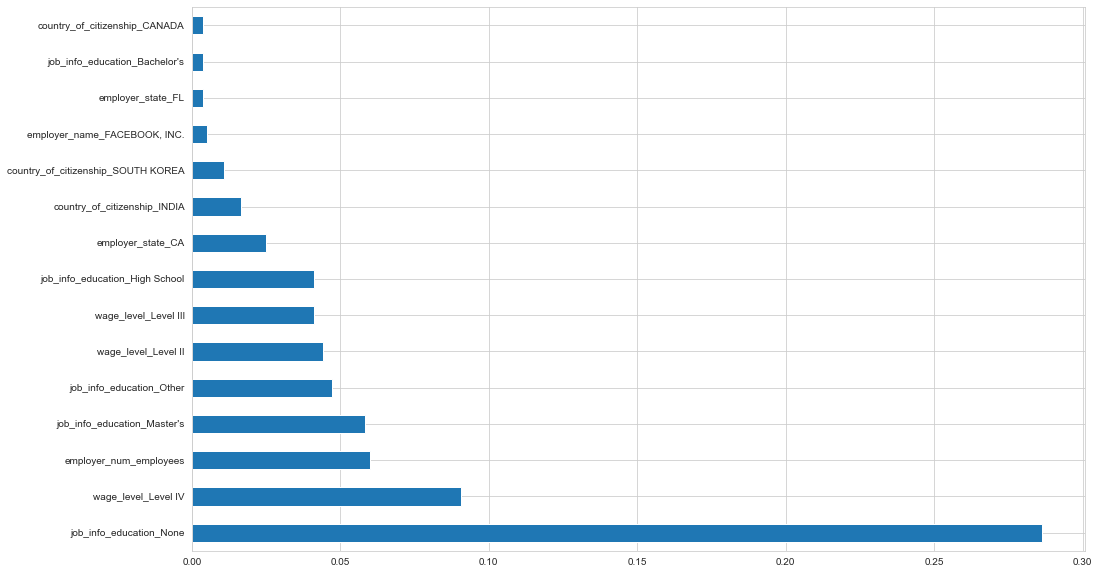

In [112]:
# Feature importance as a 
plt.figure(figsize=(16, 10))
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [116]:
# Compute  RMSE

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 19198.596522769083


## Deep Learning

In [151]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [162]:
from sklearn.model_selection import train_test_split
X = df_pre.drop(['wage_offer'], axis=1).values
y = df_pre['wage_offer'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [163]:
from sklearn.preprocessing import MinMaxScaler

In [164]:
scaler = MinMaxScaler()

In [165]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [167]:

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [168]:
model=Sequential()

model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))


#Output
model.add(Dense(1))

In [169]:
model.compile(optimizer='rmsprop',loss='mse')

In [170]:
model.fit(X_train,y_train,epochs=100)

Train on 7422 samples
Epoch 1/100
7422/7422 [==============================] - 1s 107us/sample - loss: 7585925268.5918
Epoch 2/100
7422/7422 [==============================] - 0s 55us/sample - loss: 7583682854.4241
Epoch 3/100
7422/7422 [==============================] - 0s 55us/sample - loss: 7572978031.1334
Epoch 4/100
7422/7422 [==============================] - 0s 56us/sample - loss: 7540613226.2355
Epoch 5/100
7422/7422 [==============================] - 0s 55us/sample - loss: 7464427998.7497
Epoch 6/100
7422/7422 [==============================] - 0s 55us/sample - loss: 7312312559.7887
Epoch 7/100
7422/7422 [==============================] - 0s 55us/sample - loss: 7043017589.7559
Epoch 8/100
7422/7422 [==============================] - 0s 53us/sample - loss: 6607374615.2476
Epoch 9/100
7422/7422 [==============================] - 0s 55us/sample - loss: 5952577421.0725
Epoch 10/100
7422/7422 [==============================] - 0s 57us/sample - loss: 5056061762.8456
Epoch 11/100
742

Epoch 86/100
7422/7422 [==============================] - 1s 98us/sample - loss: 430438211.7596
Epoch 87/100
7422/7422 [==============================] - 0s 66us/sample - loss: 428756721.7289
Epoch 88/100
7422/7422 [==============================] - 0s 57us/sample - loss: 426596142.4435
Epoch 89/100
7422/7422 [==============================] - 0s 54us/sample - loss: 424734959.9332
Epoch 90/100
7422/7422 [==============================] - 0s 63us/sample - loss: 422353009.2460
Epoch 91/100
7422/7422 [==============================] - 1s 69us/sample - loss: 421207856.8925
Epoch 92/100
7422/7422 [==============================] - 0s 53us/sample - loss: 419486833.7720
Epoch 93/100
7422/7422 [==============================] - 0s 56us/sample - loss: 417841636.6737
Epoch 94/100
7422/7422 [==============================] - 1s 74us/sample - loss: 415964654.2366
Epoch 95/100
7422/7422 [==============================] - 0s 53us/sample - loss: 414083367.3209
Epoch 96/100
7422/7422 [================

In [171]:
loss= model.history.history['loss']

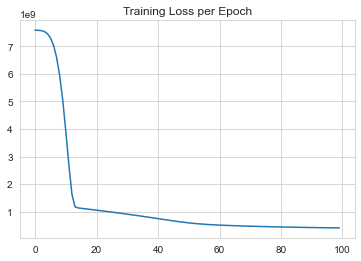

In [172]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [173]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [174]:
training_score

405903430.00161684

In [175]:
test_score

426561665.2067882

In [176]:
test_predictions = model.predict(X_test)

In [178]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [179]:
X_test.shape

(3182, 6237)

In [180]:
test_predictions = pd.Series(test_predictions.reshape(3182,))

In [181]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [182]:
pred_df.columns = ['Test Y','Model Predictions']

In [183]:
pred_df.head()

,Test Y,Model Predictions
0,125050,89609.726562
1,127878,119411.882812
2,99154,106330.101562
3,42328,89853.640625
4,119163,130556.898438


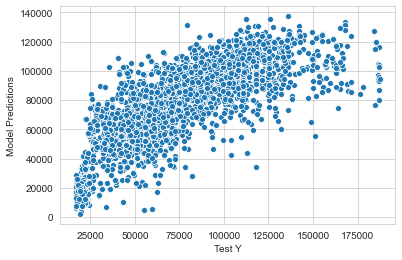

In [184]:
sns.scatterplot(x='Test Y', y='Model Predictions', data=pred_df)

plt.show()

In [185]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

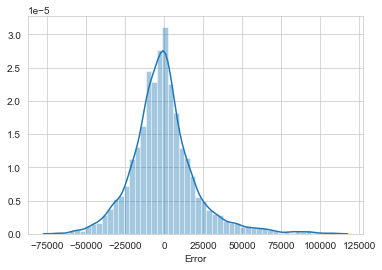

In [186]:
sns.distplot(pred_df['Error'],bins=50)

plt.show()

In [187]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [188]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

14666.91752404885

In [189]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

426561664.3919211

In [190]:
rmse = np.sqrt(mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions']))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 20653.36932299234


RMSE with Random Forest :19198
    
    
RMSE with Deep Learning: 20653